In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '..')

In [3]:
from bcb import TaxaJuros
import pandas as pd

In [11]:
service = TaxaJuros()
service.describe()

EntitySets:
  TaxasJurosMensalPorMes
  TaxasJurosDiariaPorInicioPeriodo


In [ ]:
ep = service.get_endpoint('TaxasJurosDiariaPorInicioPeriodo')

In [10]:
(ep.query()
    .filter(ep.Segmento == 'PESSOA FÍSICA')
    .select(ep.Modalidade)
    .collect())["Modalidade"].unique()

array(['AQUISIÇÃO DE OUTROS BENS - PRÉ-FIXADO',
       'AQUISIÇÃO DE VEÍCULOS - PRÉ-FIXADO',
       'CARTÃO DE CRÉDITO - PARCELADO - PRÉ-FIXADO',
       'CARTÃO DE CRÉDITO - ROTATIVO TOTAL - PRÉ-FIXADO',
       'CHEQUE ESPECIAL - PRÉ-FIXADO',
       'CRÉDITO PESSOAL CONSIGNADO INSS - PRÉ-FIXADO',
       'CRÉDITO PESSOAL CONSIGNADO PRIVADO - PRÉ-FIXADO',
       'CRÉDITO PESSOAL CONSIGNADO PÚBLICO - PRÉ-FIXADO',
       'CRÉDITO PESSOAL NÃO-CONSIGNADO - PRÉ-FIXADO',
       'DESCONTO DE CHEQUES - PRÉ-FIXADO',
       'ARRENDAMENTO MERCANTIL DE VEÍCULOS - PRÉ-FIXADO'], dtype=object)

In [4]:
service = TaxaJuros()
ep = service.get_endpoint('TaxasJurosDiariaPorInicioPeriodo')
df_cheque = (ep.query()
               .filter(ep.Segmento == 'PESSOA FÍSICA', ep.Modalidade == 'CHEQUE ESPECIAL - PRÉ-FIXADO')
               .collect())

In [5]:
df_cheque['InicioPeriodo'] = pd.to_datetime(df_cheque['InicioPeriodo'])
grp = df_cheque.groupby('InicioPeriodo')
df_mean = grp.agg({'TaxaJurosAoMes': 'mean'})

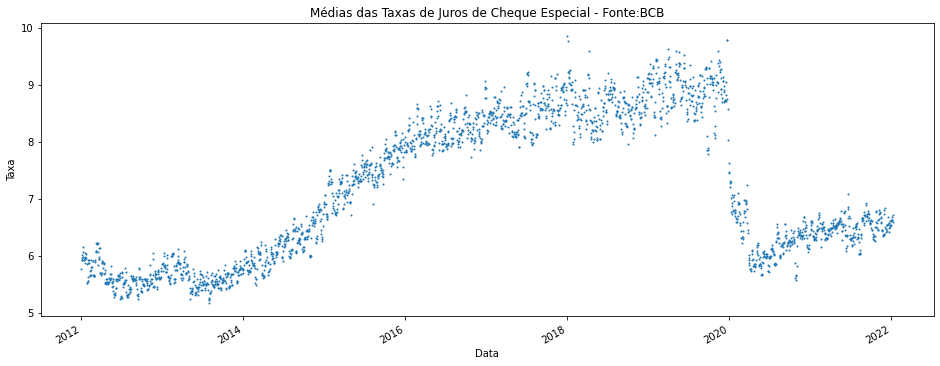

In [24]:
df_mean['TaxaJurosAoMes'].plot(figsize=(16,6), style='o', markersize=1,
                               xlabel='Data', ylabel='Taxa',
                               title='Médias das Taxas de Juros de Cheque Especial - Fonte:BCB');

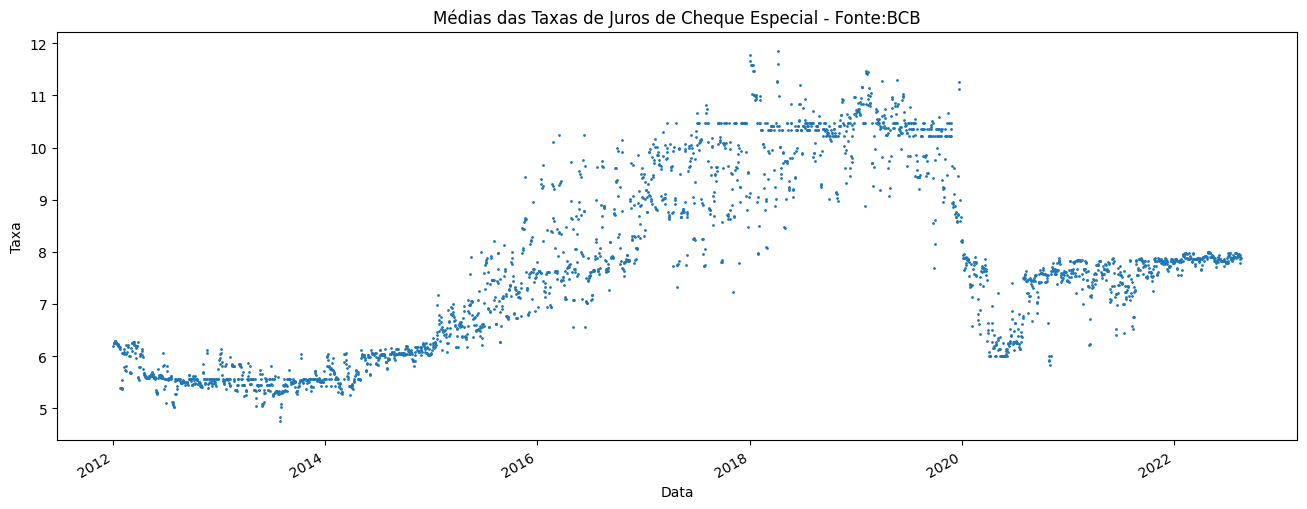

In [12]:
import pandas as pd

em = TaxaJuros()
ep = em.get_endpoint('TaxasJurosDiariaPorInicioPeriodo')
df_cheque = (ep.query()
                .filter(ep.Segmento == 'PESSOA FÍSICA',
                        ep.Modalidade == 'CHEQUE ESPECIAL - PRÉ-FIXADO')
                .collect())
df_cheque['InicioPeriodo'] = pd.to_datetime(df_cheque['InicioPeriodo'])
grp = df_cheque.groupby('InicioPeriodo')
df_mean = grp.agg({'TaxaJurosAoMes': 'median'})
df_mean['TaxaJurosAoMes'].plot(figsize=(16,6), style='o', markersize=1,
                                xlabel='Data', ylabel='Taxa',
                                title='Médias das Taxas de Juros de Cheque Especial - Fonte:BCB');


<AxesSubplot:xlabel='Date'>

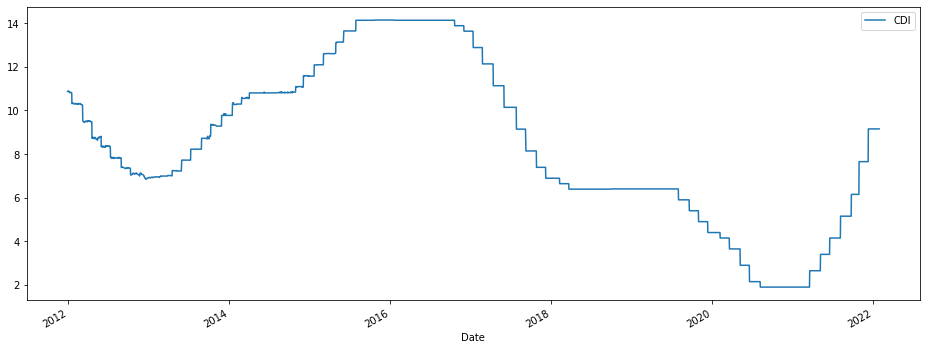

In [40]:
cdi.plot(figsize=(16,6))

In [27]:
em = TarifasBancariasPorInstituicaoFinanceira()
em.describe()

EntitySets:
  GruposConsolidados
FunctionImports:
  ListaTarifasPorInstituicaoFinanceira
  ListaInstituicoesDeGrupoConsolidado


In [37]:
em.describe('ListaTarifasPorInstituicaoFinanceira')


Function: ListaTarifasPorInstituicaoFinanceira
Parameters: PessoaFisicaOuJuridica <str>, CNPJ <str>
EntitySet: _ListaTarifasPorInstituicaoFinanceira
EntityType: br.gov.bcb.olinda.servico.Informes_ListaTarifasPorInstituicaoFinanceira.TarifaPorIF
Properties: CodigoServico <str>, Servico <str>, Unidade <str>, DataVigencia <str>, ValorMaximo <float>, TipoValor <str>, Periodicidade <str>


In [47]:
ep = em.get_endpoint('GruposConsolidados')
ep.query().limit(30).collect()

,Codigo,Nome
0,01,Bancos privados
1,02,Bancos públicos + Caixa Econômica Federal
2,03,Bancos privados + Bancos públicos + Caixa Econ...
3,04,Cooperativas de Crédito
4,05,Bancos de Desenvolvimento e Investimento
5,06,Agências de Fomento e Companhias Hipotecaria
6,07,"Sociedades de Crédito, Financiamento e Investi..."
7,08,Sociedades de Arrendamento Mercantil
8,09,Sociedades Distribuidoras...
9,10,Associações de poupança e empréstimos e socied...


In [49]:
ep = em.get_endpoint('ListaInstituicoesDeGrupoConsolidado')
df = ep.query().parameters(CodigoGrupoConsolidado='01').collect()

In [53]:
df[df['Nome'].str.contains('ITAU')]

,Cnpj,Nome
6,60394079,BANCO ITAUBANK S.A.
49,49925225,BANCO ITAULEASING S.A.
126,17192451,BANCO ITAUCARD S.A.


In [55]:
ep = em.get_endpoint('ListaTarifasPorInstituicaoFinanceira')
ep.query().limit(10).parameters(CNPJ='17192451', PessoaFisicaOuJuridica='F').collect()

,CodigoServico,Servico,Unidade,DataVigencia,ValorMaximo,TipoValor,Periodicidade
0,1101,Confecção de cadastro para início de relaciona...,Por cliente,2021-05-01,777.0,Real,Por evento
1,1601,Anuidade - cartão básico nacional,a cada 365 dias,2021-02-16,99.0,Real,A cada 360 dias
2,1602,Fornecimento de 2ª via de cartão com função cr...,por evento,2017-03-20,9.9,Real,Por evento
3,1603,Utilização de canais de atend. para retirada e...,por evento,2016-05-26,12.0,Real,Por evento
4,1605,Avaliação emergencial de crédito,por evento,2013-11-15,18.9,Real,Por evento
5,1607,Utilização de canais de atend. para retirada e...,por evento,2016-05-26,22.0,Real,Por evento


In [ ]:
ep = em.get_endpoint('GruposConsolidados')
ep.query().limit(10).collect()

,Codigo,Nome
0,01,Bancos privados
1,02,Bancos públicos + Caixa Econômica Federal
2,03,Bancos privados + Bancos públicos + Caixa Econ...
3,04,Cooperativas de Crédito
4,05,Bancos de Desenvolvimento e Investimento
5,06,Agências de Fomento e Companhias Hipotecaria
6,07,"Sociedades de Crédito, Financiamento e Investi..."
7,08,Sociedades de Arrendamento Mercantil
8,09,Sociedades Distribuidoras...
9,10,Associações de poupança e empréstimos e socied...


In [6]:
from bcb import Expectativas

In [7]:
# service = me.get_service()
# api = service['ExpectativasMercadoAnuais']
# service.query(api).limit(10).filter()

me = Expectativas()
api = me.get_endpoint('ExpectativasMercadoAnuais')
df = api.get(
    api.Indicador == 'IPCA', api.Data >= '2022-01-01',
    api.Data.asc(),
    api.Data, api.DataReferencia, api.Media,
    limit=10, skip=10
)

# api.filter().orderby().select().limit().skip().get()

In [8]:
me.describe()

EntitySets:
  ExpectativasMercadoTop5Anuais
  ExpectativasMercadoInstituicoes
  ExpectativaMercadoMensais
  ExpectativasMercadoInflacao12Meses
  ExpectativasMercadoTop5Mensais
  ExpectativasMercadoTrimestrais
  ExpectativasMercadoAnuais


In [9]:
me.describe('ExpectativasMercadoTop5Anuais')


EntitySet (Endpoint): ExpectativasMercadoTop5Anuais
EntityType: br.gov.bcb.olinda.servico.Expectativas.ExpectativasMercadoTop5Anual
Properties: Indicador, Data, DataReferencia, tipoCalculo, Media, Mediana, DesvioPadrao, Minimo, Maximo


In [10]:
df

,Data,DataReferencia,Media
0,2022-01-04,2021,10.0158
1,2022-01-04,2022,5.1008
2,2022-01-04,2023,3.4629
3,2022-01-04,2024,3.2114
4,2022-01-04,2025,3.1945
5,2022-01-04,2021,10.0044
6,2022-01-04,2022,5.0389
7,2022-01-04,2023,3.4391
8,2022-01-04,2024,3.1784
9,2022-01-04,2025,3.1790


In [11]:
from bcb import PTAX

In [12]:

ptax = PTAX()
ptax.describe()

EntitySets:
  Moedas
FunctionImports:
  CotacaoMoedaPeriodoFechamento
  CotacaoMoedaAberturaOuIntermediario
  CotacaoMoedaDia
  CotacaoMoedaPeriodo
  CotacaoDolarDia
  CotacaoDolarPeriodo


In [13]:
ptax.describe('Moedas')


EntitySet (Endpoint): Moedas
EntityType: br.gov.bcb.olinda.servico.PTAX.TipoMoeda
Properties: simbolo, nomeFormatado, tipoMoeda


In [21]:
api = ptax.get_endpoint('Moedas')
api.get(
    api.tipoMoeda == 'B',
    limit=10
)

,simbolo,nomeFormatado,tipoMoeda
0,AUD,Dólar australiano,B
1,EUR,Euro,B
2,GBP,Libra Esterlina,B


In [16]:
ptax.describe('CotacaoMoedaPeriodo')


Function: CotacaoMoedaPeriodo
Parameters: moeda, dataInicial, dataFinalCotacao
EntitySet: _CotacaoMoedaPeriodo
EntityType: br.gov.bcb.olinda.servico.PTAX.TipoCotacaoMoeda
Properties: paridadeCompra, paridadeVenda, cotacaoCompra, cotacaoVenda, dataHoraCotacao, tipoBoletim


In [17]:
api = ptax.get_endpoint('CotacaoMoedaPeriodo')
api.get(
    api.dataHoraCotacao, api.cotacaoCompra, api.cotacaoVenda,
    limit=10,
    moeda='USD',
    dataInicial='01/01/2022',
    dataFinalCotacao='01/10/2022'
)

,cotacaoCompra,cotacaoVenda,dataHoraCotacao
0,5.5884,5.5890,2022-01-03 10:04:22.186
1,5.6242,5.6248,2022-01-03 11:11:42.883
2,5.6444,5.6450,2022-01-03 12:09:19.76
3,5.6643,5.6649,2022-01-03 13:11:50.353
4,5.6303,5.6309,2022-01-03 13:11:50.357
5,5.6902,5.6908,2022-01-04 10:05:22.015
6,5.7015,5.7021,2022-01-04 11:05:20.148
7,5.6487,5.6493,2022-01-04 12:10:19.466
8,5.6674,5.6680,2022-01-04 13:08:59.118
9,5.6770,5.6776,2022-01-04 13:08:59.123


In [22]:
from bcb import IFDATA

In [23]:
ifdata = IFDATA()
ifdata.describe()

FunctionImports:
  ListaDeRelatorio
  IfDataCadastro
  IfDataValores


In [24]:
ifdata.describe('ListaDeRelatorio')


Function: ListaDeRelatorio
Parameters: 
EntitySet: _ListaDeRelatorio
EntityType: br.gov.bcb.olinda.servico.IFDATA.ListaRelatorio
Properties: NomeRelatorio, NumeroRelatorio


In [30]:
api = ifdata.get_endpoint('ListaDeRelatorio')
api.get(limit=10)

URL:
  https://olinda.bcb.gov.br/olinda/servico/IFDATA/versao/v1/odata/ListaDeRelatorio()
Query Parameters:
  $top = 10
  $format = application/json
Return: NomeRelatorio, NumeroRelatorio
{"@odata.context":"https://was-p.bcnet.bcb.gov.br/olinda/servico/IFDATA/versao/v1/odata$metadata#_ListaDeRelatorio","value":[{"NomeRelatorio":"Resumo","NumeroRelatorio":"1"},{"NomeRelatorio":"Ativo","NumeroRelatorio":"2"},{"NomeRelatorio":"Passivo","NumeroRelatorio":"3"},{"NomeRelatorio":"Demonstração de Resultado","NumeroRelatorio":"4"},{"NomeRelatorio":"Informações de Capital","NumeroRelatorio":"5"},{"NomeRelatorio":"Segmentação","NumeroRelatorio":"6"},{"NomeRelatorio":"Carteira de Crédito Ativa - Por indexador","NumeroRelatorio":"7"},{"NomeRelatorio":"Carteira de crédito ativa - por nível de risco da operação","NumeroRelatorio":"8"},{"NomeRelatorio":"Carteira de crédito ativa - por região geográfica","NumeroRelatorio":"9"},{"NomeRelatorio":"Carteira de crédito ativa - quantidade de clientes e de op

,NomeRelatorio,NumeroRelatorio
0,Resumo,1
1,Ativo,2
2,Passivo,3
3,Demonstração de Resultado,4
4,Informações de Capital,5
5,Segmentação,6
6,Carteira de Crédito Ativa - Por indexador,7
7,Carteira de crédito ativa - por nível de risco...,8
8,Carteira de crédito ativa - por região geográfica,9
9,Carteira de crédito ativa - quantidade de clie...,10


In [36]:
ifdata.describe('IfDataCadastro')


Function: IfDataCadastro
Parameters: AnoMes
EntitySet: _IfDataCadastro
EntityType: br.gov.bcb.olinda.servico.IFDATA.TipoIfDataCadastro
Properties: CodInst, Data, NomeInstituicao, DataInicioAtividade, Tcb, Td, Tc, SegmentoTb, Atividade, Uf, Municipio, Sr, CodConglomeradoFinanceiro, CodConglomeradoPrudencial, CnpjInstituicaoLider, Situacao


In [35]:
api = ifdata.get_endpoint('IfDataCadastro')
api.get(limit=10, AnoMes=202110)

URL:
  https://olinda.bcb.gov.br/olinda/servico/IFDATA/versao/v1/odata/IfDataCadastro(AnoMes=@AnoMes)
Function Parameters:
  AnoMes (required: True) = 202110
Query Parameters:
  $top = 10
  $format = application/json
Return: CodInst, Data, NomeInstituicao, DataInicioAtividade, Tcb, Td, Tc, SegmentoTb, Atividade, Uf, Municipio, Sr, CodConglomeradoFinanceiro, CodConglomeradoPrudencial, CnpjInstituicaoLider, Situacao
{"@odata.context":"https://was-p.bcnet.bcb.gov.br/olinda/servico/IFDATA/versao/v1/odata$metadata#_IfDataCadastro","value":[{"CodInst":"C0041856","Data":"202110","NomeInstituicao":"ABC-BRASIL","DataInicioAtividade":180001,"Tcb":"B1","Td":"C","Tc":3,"SegmentoTb":null,"Atividade":"Crédito Atacado","Uf":"SP","Municipio":"São Paulo","Sr":"S3","CodConglomeradoFinanceiro":"C0041856","CodConglomeradoPrudencial":"C0080312","CnpjInstituicaoLider":"28195667","Situacao":"A"},{"CodInst":"C0080312","Data":"202110","NomeInstituicao":"ABC-BRASIL - PRUDENCIAL","DataInicioAtividade":180001,"Tc

,CodInst,Data,NomeInstituicao,DataInicioAtividade,Tcb,Td,Tc,SegmentoTb,Atividade,Uf,Municipio,Sr,CodConglomeradoFinanceiro,CodConglomeradoPrudencial,CnpjInstituicaoLider,Situacao
0,C0041856,202110,ABC-BRASIL,180001,B1,C,3,None,Crédito Atacado,SP,São Paulo,S3,C0041856,C0080312,28195667,A
1,C0080312,202110,ABC-BRASIL - PRUDENCIAL,180001,B1,C,3,None,Crédito Atacado,SP,São Paulo,S3,C0041856,C0080312,28195667,A
2,C0051956,202110,AGIBANK,180001,B1,C,2,None,Crédito Varejo,SP,Campinas,S4,C0051956,C0083694,10664513,A
3,C0083694,202110,AGIBANK - PRUDENCIAL,180001,B1,C,2,None,Crédito Varejo,SP,Campinas,S4,C0051956,C0083694,10664513,A
4,01542356,202110,AGROBANCO-BANCO COMERCIAL S.A.,194602,B1,I,2,Banco Comercial,None,GO,Goiânia,None,None,None,None,I
5,C0051293,202110,ALFA,180001,B1,C,2,None,Crédito Diversificado,SP,São Paulo,S3,C0051293,C0080570,60770336,A
6,C0080570,202110,ALFA - PRUDENCIAL,180001,B1,C,2,None,Crédito Diversificado,SP,São Paulo,S3,C0051293,C0080570,60770336,A
7,C0051949,202110,ANDBANK,180001,B1,C,3,None,Tesouraria e Negócios,SP,São Paulo,S4,C0051949,C0081256,48795256,A
8,C0081256,202110,ANDBANK - PRUDENCIAL,180001,B1,C,3,None,Tesouraria e Negócios,SP,São Paulo,S4,C0051949,C0081256,48795256,A
9,28195667,202110,BANCO ABC BRASIL S.A.,198312,B1,I,3,Banco Múltiplo,None,SP,São Paulo,S3,C0041856,C0080312,28195667,A


In [38]:
from bcb import TaxaJuros

tj = TaxaJuros()

EntitySets:
  PeriodosDisponiveis
FunctionImports:
  TaxasJurosMensalPorMes
  TaxasJurosDiariaPorInicioPeriodo

Function: TaxasJurosMensalPorMes
Parameters: Mes
EntitySet: _TaxasJurosMensalPorMes
EntityType: br.gov.bcb.olinda.servico.taxaJuros.TaxaJurosMensal
Properties: Mes, Modalidade, Posicao, InstituicaoFinanceira, TaxaJurosAoMes, TaxaJurosAoAno


In [46]:
tj.describe()
tj.describe('PeriodosDisponiveis')
tj.describe('TaxasJurosMensalPorMes')
tj.describe('TaxasJurosDiariaPorInicioPeriodo')

EntitySets:
  PeriodosDisponiveis
FunctionImports:
  TaxasJurosMensalPorMes
  TaxasJurosDiariaPorInicioPeriodo

EntitySet (Endpoint): PeriodosDisponiveis
EntityType: br.gov.bcb.olinda.servico.taxaJuros.DtInicioPeriodo
Properties: inicioPeriodo, fimPeriodo

Function: TaxasJurosMensalPorMes
Parameters: Mes <str>
EntitySet: _TaxasJurosMensalPorMes
EntityType: br.gov.bcb.olinda.servico.taxaJuros.TaxaJurosMensal
Properties: Mes <str>, Modalidade <str>, Posicao <int>, InstituicaoFinanceira <str>, TaxaJurosAoMes <float>, TaxaJurosAoAno <float>

Function: TaxasJurosDiariaPorInicioPeriodo
Parameters: InicioPeriodo <str>
EntitySet: _TaxasJurosDiariaPorInicioPeriodo
EntityType: br.gov.bcb.olinda.servico.taxaJuros.TaxaJurosDiaria
Properties: InicioPeriodo <str>, FimPeriodo <str>, Segmento <str>, Modalidade <str>, Posicao <int>, InstituicaoFinanceira <str>, TaxaJurosAoMes <float>, TaxaJurosAoAno <float>


In [47]:
api = tj.get_endpoint('PeriodosDisponiveis')
api.get(limit=10)

URL:
  https://olinda.bcb.gov.br/olinda/servico/taxaJuros/versao/v1/odata/PeriodosDisponiveis
Query Parameters:
  $top = 10
  $format = application/json
Return: inicioPeriodo, fimPeriodo
{"@odata.context":"https://was-p.bcnet.bcb.gov.br/olinda/servico/taxaJuros/versao/v1/odata$metadata#PeriodosDisponiveis","value":[{"inicioPeriodo":"2021-12-27","fimPeriodo":"2021-12-31"},{"inicioPeriodo":"2021-12-24","fimPeriodo":"2021-12-30"},{"inicioPeriodo":"2021-12-23","fimPeriodo":"2021-12-29"},{"inicioPeriodo":"2021-12-22","fimPeriodo":"2021-12-28"},{"inicioPeriodo":"2021-12-21","fimPeriodo":"2021-12-27"},{"inicioPeriodo":"2021-12-20","fimPeriodo":"2021-12-24"},{"inicioPeriodo":"2021-12-17","fimPeriodo":"2021-12-23"},{"inicioPeriodo":"2021-12-16","fimPeriodo":"2021-12-22"},{"inicioPeriodo":"2021-12-15","fimPeriodo":"2021-12-21"},{"inicioPeriodo":"2021-12-14","fimPeriodo":"2021-12-20"}]}


,inicioPeriodo,fimPeriodo
0,2021-12-27,2021-12-31
1,2021-12-24,2021-12-30
2,2021-12-23,2021-12-29
3,2021-12-22,2021-12-28
4,2021-12-21,2021-12-27
5,2021-12-20,2021-12-24
6,2021-12-17,2021-12-23
7,2021-12-16,2021-12-22
8,2021-12-15,2021-12-21
9,2021-12-14,2021-12-20


In [48]:
tj.get_endpoint('TaxasJurosMensalPorMes').get(limit=10, Mes='Jan-2020')

URL:
  https://olinda.bcb.gov.br/olinda/servico/taxaJuros/versao/v1/odata/TaxasJurosMensalPorMes(Mes=@Mes)
Function Parameters:
  Mes (required: True) = Jan-2020
Query Parameters:
  $top = 10
  $format = application/json
Return: Mes, Modalidade, Posicao, InstituicaoFinanceira, TaxaJurosAoMes, TaxaJurosAoAno
{"@odata.context":"https://was-p.bcnet.bcb.gov.br/olinda/servico/taxaJuros/versao/v1/odata$metadata#_TaxasJurosMensalPorMes","value":[{"Mes":"Jan-2020","Modalidade":"FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS - PÓS-FIXADO REFERENCIADO EM IPCA","Posicao":51,"InstituicaoFinanceira":"APE POUPEX","TaxaJurosAoMes":0.37,"TaxaJurosAoAno":4.49},{"Mes":"Jan-2020","Modalidade":"FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO - PRÉ-FIXADO","Posicao":161,"InstituicaoFinanceira":"CH PIRATINI - CHP","TaxaJurosAoMes":1.04,"TaxaJurosAoAno":13.25},{"Mes":"Jan-2020","Modalidade":"FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO - PRÉ-FIXADO","Posicao":250,"InstituicaoFinanceira":"APE POUPEX","TaxaJur

,Mes,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno
0,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,51,APE POUPEX,0.37,4.49
1,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,161,CH PIRATINI - CHP,1.04,13.25
2,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,250,APE POUPEX,1.22,15.72
3,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,16,CAIXA ECONOMICA FEDERAL,0.39,4.75
4,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,17,APE POUPEX,0.39,4.80
5,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,42,BCO DO BRASIL S.A.,0.52,6.41
6,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,46,BANCO BARI S.A.,0.63,7.82
7,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,53,BARI CIA HIPOTECÁRIA,0.71,8.87
8,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,56,BANCO SEMEAR,0.73,9.06
9,Jan-2020,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,59,BCO BANESTES S.A.,0.55,6.79


In [89]:
from bcb import SPI

spi = SPI()

In [90]:
spi.describe()
spi.describe('PixLiquidadosAtual')
spi.describe('PixLiquidadosIntradia')

EntitySets:
  PixLiquidadosAtual
  PixLiquidadosIntradia

EntitySet (Endpoint): PixLiquidadosAtual
EntityType: br.gov.bcb.olinda.servico.SPI.PixLiquidadosAtual
Properties: Data<datetime>, Quantidade<int>, Total<float>, Media<float>

EntitySet (Endpoint): PixLiquidadosIntradia
EntityType: br.gov.bcb.olinda.servico.SPI.PixLiquidadosIntradia
Properties: Horario<str>, QuantidadeMedia<int>, TotalMedio<float>


In [94]:
ep = spi.get_endpoint('PixLiquidadosAtual')
ep.get(ep.Data.asc(), limit=10)

,Data,Quantidade,Total,Media
0,2020-11-03,2345,210.24,89.65
1,2020-11-04,2629,336.37,127.94
2,2020-11-05,16669,2685.84,161.13
3,2020-11-06,57936,21133.81,364.78
4,2020-11-07,11089,2333.89,210.47
5,2020-11-08,7049,1493.58,211.88
6,2020-11-09,88184,37004.03,419.62
7,2020-11-10,135444,55316.78,408.41
8,2020-11-11,216871,85757.62,395.43
9,2020-11-12,288401,118321.97,410.27


In [98]:
ep.query().limit(10).orderby(ep.Data.asc()).show()

URL:
  https://olinda.bcb.gov.br/olinda/servico/SPI/versao/v1/odata/PixLiquidadosAtual
Query Parameters:
  $orderby = Data asc
  $top = 10
Return: Data<datetime>, Quantidade<int>, Total<float>, Media<float>


In [53]:
from bcb import MercadoImobiliario

mi = MercadoImobiliario()

In [57]:
mi.describe()
mi.describe('mercadoimobiliario')

EntitySets:
  mercadoimobiliario

EntitySet (Endpoint): mercadoimobiliario
EntityType: br.gov.bcb.olinda.servico.MercadoImobiliario.TipoCreditoImobiliario
Properties: Data<str>, Info<str>, Valor<float>


In [71]:
mi.get_endpoint('mercadoimobiliario').get(limit=20)

,Data,Info,Valor
0,2018-03-31,credito_estoque_parcela_pf_comercial_pr,2.220160e+03
1,2021-05-31,credito_estoque_risco_operacao_pf_home_equity_...,1.245000e+01
2,2021-10-31,credito_contratacao_ltv_pf_livre_ma,8.081000e+01
3,2015-11-30,credito_estoque_risco_operacao_pf_sfh_aa_ro,6.533000e+01
4,2016-03-31,credito_estoque_parcela_pf_comercial_rs,1.875700e+03
5,2018-02-28,imoveis_area_total_se,7.695000e+01
6,2014-04-30,credito_estoque_risco_operacao_pf_home_equity_...,7.570000e+00
7,2015-05-31,credito_contratacao_taxa_pj_livre_es,1.071000e+01
8,2019-02-28,credito_contratacao_contratado_mediana_pj_fgts,1.774506e+07
9,2014-12-31,credito_estoque_risco_operacao_pj_sfh_c_es,7.400000e-01
